## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [165]:
import numpy as np 
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [166]:
x = np.linspace(0,20)
y = (-2*x)+1

#### Plot your data points. 

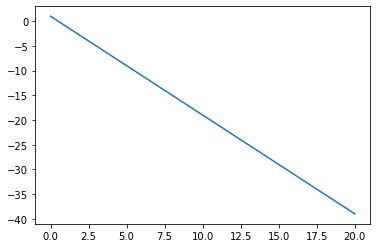

In [76]:
plt.plot(x,y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [77]:
import numpy as np


def gradient_descent(x,y,n,theta0,theta1,eta):
    n_iter = 0
    m = len(x)
    x0 = np.ones(m)
    cost_lst = []
    theta0_lst = []
    theta1_lst = []
    hypo_list = []
    for i in range(n):
        hypo = theta0*x0 + theta1*x
        hypo_list.append(hypo)
        cost_func = (1/2*m) * np.sum(np.square(hypo-y))
        diff_theta0 = (1/m) * np.sum((hypo-y)*x0)
        diff_theta1 = (1/m) * np.sum((hypo-y)*x)
        gradient = (diff_theta0**2 + diff_theta1**2)**.5
        theta0 = theta0 - eta * diff_theta0
        theta1 = theta1 - eta * diff_theta1
        cost_lst.append(cost_func)
        theta0_lst.append(theta0)
        theta1_lst.append(theta1)
        if gradient < .001:
            break
    return  theta0 , theta1 , cost_func , theta0_lst , theta1_lst , cost_lst,hypo_list


                                

In [78]:
 theta0 , theta1 , cost_func , theta0_lst , theta1_lst , cost_lst,hypo_list = gradient_descent(x,y,100,0,0,.005)
    

In [79]:
y_predict = theta0 + theta1 * x

In [80]:
from sklearn.metrics import r2_score
r2_score(y, y_predict)

0.9981252304310719

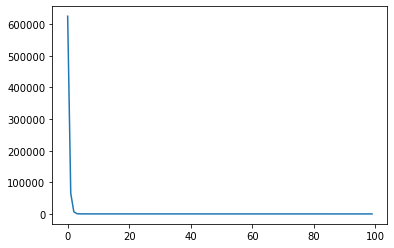

In [81]:
plt.plot(cost_lst)

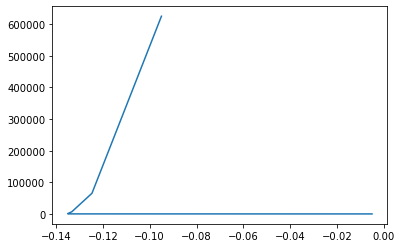

In [82]:
plt.plot(theta0_lst,cost_lst)

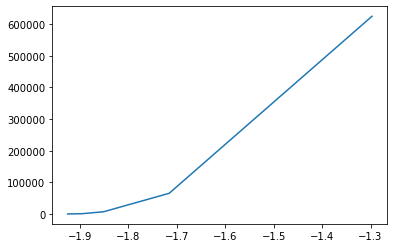

In [83]:
plt.plot(theta1_lst,cost_lst)

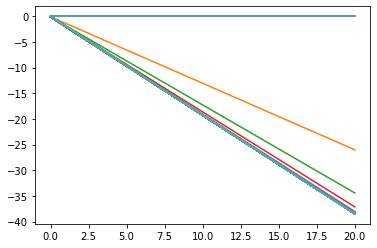

In [84]:
for i in range(len(hypo_list)):
    plt.plot(x,hypo_list[i])

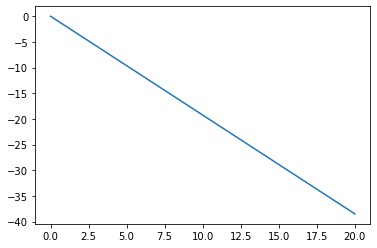

In [85]:
plt.plot(x,y_predict)

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

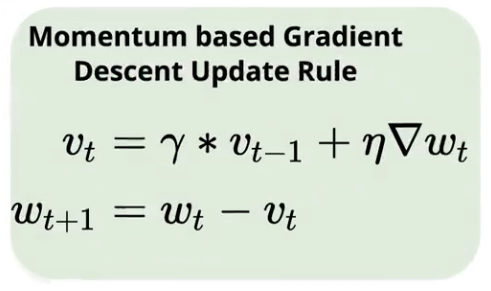

#### γ takes values between 0 and 1.
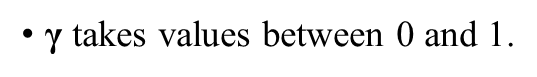

In [167]:
#code for momentum GD
import numpy as np
import matplotlib.pyplot as plt


def momentum_GD(x,y,theta0,theta1,eta):
      cost_lst = []
      theta0_lst = []
      theta1_lst = []
      m = len(y)
      x0 = np.ones(m)
      n_iter=0
      for i in range(100):
          v_theta0 = 0
          v_theta1 = 0

          gamma = .7
          
          
          predicted_output = theta0*x0 + theta1*x

          cost_func = 1/(2 * m) * np.sum(np.square(predicted_output-y))

          diff_theta0 = 1/m *np.sum((predicted_output - y)*x0)
          diff_theta1 = 1/m *np.sum((predicted_output - y)*x)
          v_theta0 = v_theta0 * gamma + eta * diff_theta0
          v_theta1 = v_theta1 * gamma + eta * diff_theta1


          gradient = (diff_theta0**2 + diff_theta1**2)**0.5
          theta0 = theta0 -  v_theta0
          theta1 = theta1 - v_theta1
          cost_lst.append(cost_func)
          theta0_lst.append(theta0)
          theta1_lst.append(theta1)
       
          n_iter+=1
          if gradient < .001:
            break
  #cost_func = 1/(2 * m) * np.sum(np.square(predicted_output-y))
      return cost_lst , theta0 , theta1 , n_iter , theta0_lst ,theta1_lst

momentum_GD(x , y ,theta0 = 0 , theta1 = 0,eta = .001)







([249.88775510204087,
  186.82544901821942,
  139.68837516021625,
  104.45490187382671,
  78.11898842228952,
  58.43371572199665,
  43.719583789283334,
  32.721220227470425,
  24.500274414542673,
  18.355359342017675,
  13.762210705990888,
  10.328957746061077,
  7.7626896313467855,
  5.844464905842485,
  4.410631849965179,
  3.3388660496390403,
  2.5377339267913492,
  1.938891812968691,
  1.4912550069458363,
  1.156639332215653,
  0.9065033409350508,
  0.7195132158124087,
  0.5797226123323642,
  0.4752121491691663,
  0.3970724708856112,
  0.3386441199013128,
  0.2949493651570234,
  0.2622675122555592,
  0.23781746140676593,
  0.21952042966789267,
  0.20582259342487277,
  0.19556251933278046,
  0.1878720731936954,
  0.18210235251955684,
  0.17776832349733326,
  0.1745074388953092,
  0.17204870627464974,
  0.17018956746915467,
  0.16877861673756953,
  0.16770268313644945,
  0.16687717500799548,
  0.16623886279423872,
  0.1657404844220147,
  0.16534671300117218,
  0.16503114280824485,
  

In [168]:
cost_lst , theta0 , theta1 , n_iter , theta0_lst ,theta1_lst = momentum_GD(x,y,0,0,.0005)


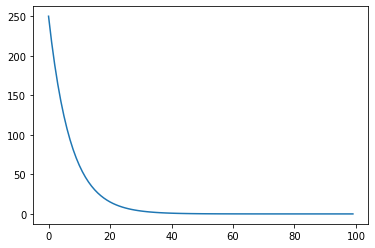

In [169]:
plt.plot(cost_lst)

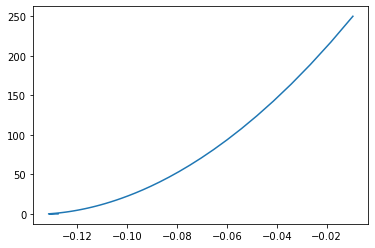

In [170]:
plt.plot(theta0_lst,cost_lst)

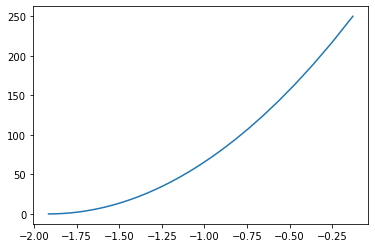

In [171]:
plt.plot(theta1_lst,cost_lst)

In [172]:
y_predict = theta0 + theta1 * x

In [173]:
from sklearn.metrics import r2_score
r2_score(y, y_predict)

0.9976358237484103

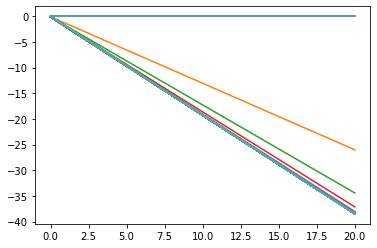

In [174]:
for i in range(len(hypo_list)):
    plt.plot(x,hypo_list[i])

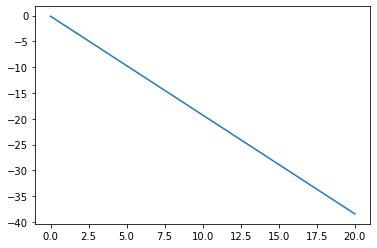

In [175]:
plt.plot(x,y_predict)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

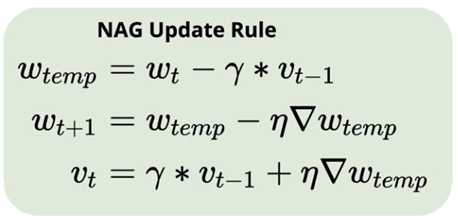

In [176]:
import numpy as np
import matplotlib.pyplot as plt

In [246]:

def n_A_G(x,y):
    theta0_temp = 0
    theta1_temp = 0
    theta0 = 0
    theta1 = 0
    gamma = 0.7
    v_theta0 = 0
    v_theta1 = 0
    eta = 0.005
    m = len(x)
    x0 = np.ones(m)
    cost_lst = []
    theta0_lst = []
    theta1_lst = []
    theta0_temp_lst = []
    theta1_temp_lst = []
    hypo_lst=[]
    hypo_temp_lst=[]
    
    for i in range(1000):
        hypo = theta0 * x0 + theta1 * x 
        cost_func = (1/2*m) * np.sum(np.square(hypo - y))
        
        theta0_temp = theta0 - (gamma * v_theta0 )
        theta1_temp = theta1 - (gamma * v_theta1 )
        hypo_theta_temp = theta0_temp * x0 + theta1_temp * x
        
        diff_theta0_temp = (1/m) * np.sum( (hypo_theta_temp - y)*x0 )
        diff_theta1_temp = (1/m) * np.sum( (hypo_theta_temp - y)*x )
        
        theta0 = theta0_temp - eta * diff_theta0_temp
        theta1 = theta1_temp - eta * diff_theta1_temp
        
        v_theta0 = gamma * v_theta0 + eta * diff_theta0_temp
        v_theta1 = gamma * v_theta1 + eta * diff_theta1_temp
        
        gradient = (diff_theta0_temp**2 + diff_theta1_temp**2)**0.5
        
        cost_lst.append(cost_func)
        theta0_lst.append(theta0)
        theta1_lst.append(theta1) 
        theta0_temp_lst.append(theta0_temp) 
        theta1_temp_lst.append(theta1_temp) 
        hypo_lst.append(hypo)
        hypo_temp_lst.append(hypo_theta_temp)
        
        if gradient < .001 :
            break
    return theta0,theta1,theta0_temp,theta1_temp,cost_lst , theta0_lst ,theta1_lst , theta0_temp_lst ,theta1_temp_lst,hypo_lst,hypo_temp_lst          


In [247]:
theta0,theta1,theta0_temp,theta1_temp,cost_lst , theta0_lst ,theta1_lst , theta0_temp_lst ,theta1_temp_lst,hypo_lst ,hypo_temp_lst= n_A_G(x,y)

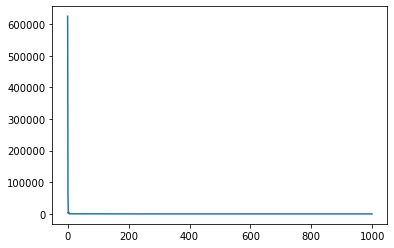

In [248]:
plt.plot(cost_lst)


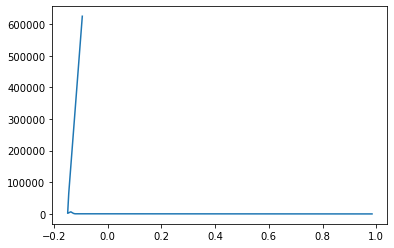

In [249]:
plt.plot(theta0_lst,cost_lst)

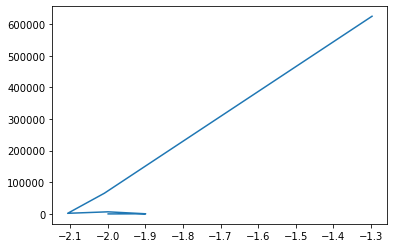

In [250]:
plt.plot(theta1_lst,cost_lst)

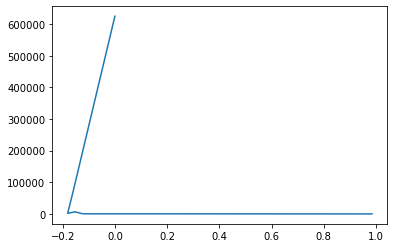

In [251]:
plt.plot(theta0_temp_lst,cost_lst)

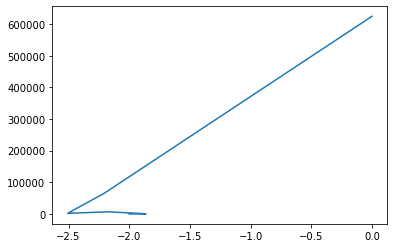

In [263]:
plt.plot(theta1_temp_lst,cost_lst)

In [264]:
y_predict = theta0 + theta1 * x
y_predict_temp = theta0_temp + theta1_temp * x

In [265]:
from sklearn.metrics import r2_score
print(r2_score(y, y_predict))
print(r2_score(y, y_predict_temp))


0.9999995529372133
0.9999995517898084


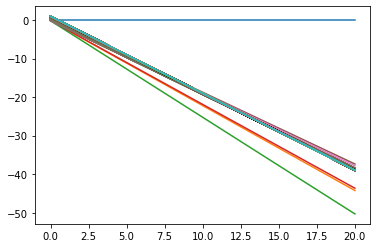

In [266]:
for i in range(len(hypo_temp_lst)):
    plt.plot(x,hypo_temp_lst[i])

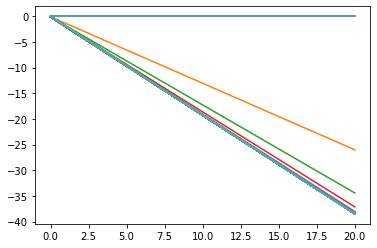

In [268]:
for i in range(len(hypo_list)):
    plt.plot(x,hypo_list[i])

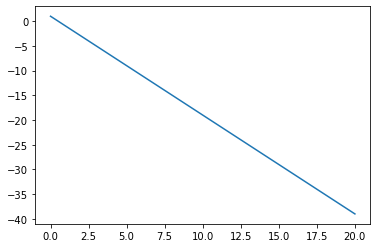

In [269]:
plt.plot(x,y_predict)

## Congratulations 
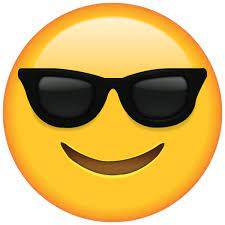